In [1]:
!date

Wed Aug 20 05:01:37 PM EDT 2025


In [2]:
pwd

'/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code'

In [3]:
import os
import numpy as np
import pandas as pd
import ants

In [4]:
import DeepCor_utils
from DeepCor_utils import *

numpy version: 1.20.1
sklearn version: 1.3.2
torch version: 2.4.1+cu121
AntsPy version: 0.6.1


## Forrest

In [21]:
analysis_name = 'DeNN-forrest-neurips-v1'
analysis_dir = os.path.join('../Data/StudyForrest/ensembles_last_CVAE',analysis_name)
analysis_dir

'../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1'

In [22]:
indir = '../Data/StudyForrest/fmriprep/'
subs = [s for s in os.listdir(indir) if all((s.startswith('sub'),not s.endswith('.html')))]
subs.sort()
print(len(subs))

svec = np.arange(14)
rvec = np.arange(1,4+1)
print(svec)
print(rvec)

conf_fn = os.path.join(indir,'{sub}/ses-localizer/func/{sub}_ses-localizer_task-objectcategories_run-{r}_bold_confounds.tsv')
gm_fn = os.path.join(indir,'mask_roi.nii')
signal_fn = os.path.join(analysis_dir,'DeNN-Denoised-S{s}-R{r}.nii.gz')
events_fn = '../Data/StudyForrest/events/{sub}_ses-localizer_task-objectcategories_run-{r}_events.tsv'

14
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[1 2 3 4]


In [24]:
for s in svec:
    sub = subs[s]
    for r in rvec:
        im = ants.image_read(signal_fn.format(s=s,r=r))
        gm = ants.image_read(gm_fn)
        X1 = DeepCor_utils.get_design_matrix(im,events_fn.format(sub=subs[s],r=r))
        
        correlation_analyses = []
        contrast_analyses = []
        
        correlation_analyses.append(
            {'corr_target' : X1['face'].values,
             'filename' : os.path.join(ofdir,f'corr2face_S{s}_R{r}.nii.gz'),
             'plot' : None, 
             'ROI' : f'../Data/StudyForrest/ROIs/rFFA_final_mask_{sub}_bin.nii.gz'})
        
        correlation_analyses.append(
            {'corr_target' : X1[['house','scene']].values.mean(axis=1),
             'filename' : os.path.join(ofdir,f'corr2place_S{s}_R{r}.nii.gz'),
             'plot' : None,
             'ROI' : f'../Data/StudyForrest/ROIs/rPPA_final_mask_{sub}_bin.nii.gz'})
        
        contrast_analyses.append(
            {'contrast_vec' : [-1,5,-1,-1,-1,-1,0,0,0,0],
             'design_matrix' : X1,
             'filename' : os.path.join(ofdir,f'contrast_face_{s}_R{r}.nii.gz'),
             'plot' : None, 
             'ROI' : f'../Data/StudyForrest/ROIs/rFFA_final_mask_{sub}_bin.nii.gz'})
        
        contrast_analyses.append(
            {'contrast_vec' : [-1,-1,2,-1,2,-1,0,0,0,0],
             'design_matrix' : X1,
             'filename' : os.path.join(ofdir,f'contrast_place_S{s}_R{r}.nii.gz'),
             'plot' : None,
             'ROI' : f'../Data/StudyForrest/ROIs/rPPA_final_mask_{sub}_bin.nii.gz'})
        
        for analysis_spec in correlation_analyses:
            run_correlation_analysis_from_spec(analysis_spec,im,im,im,gm)
        
        for analysis_spec in contrast_analyses:
            run_contrast_analysis_from_spec(analysis_spec,im,im,im,gm)

saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S0_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S0_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S0_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S0_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S0_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S0_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_0_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_0_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_0_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ens

/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S0_R3_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S0_R3_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S0_R3_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S0_R3_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S0_R3_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S0_R3_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_0_R3_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_0_R3_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_0_R3_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S0_R3_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S0_R3_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S0_R3_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S0_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S0_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S0_R4_deepcor.nii.gz
saved as: ../Data/Stud

/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S1_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S1_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S1_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S1_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S1_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S1_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_1_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_1_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_1_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S1_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S1_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S1_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S1_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S1_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S1_R2_deepcor.nii.gz
saved as: ../Data/Stud

/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S1_R3_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S1_R3_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S1_R3_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S1_R3_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S1_R3_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S1_R3_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_1_R3_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_1_R3_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_1_R3_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S1_R3_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S1_R3_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S1_R3_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S1_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S1_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S1_R4_deepcor.nii.gz
saved as: ../Data/Stud

/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S2_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S2_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S2_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S2_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S2_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S2_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_2_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_2_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_2_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S2_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S2_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S2_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S2_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S2_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S2_R2_deepcor.nii.gz
saved as: ../Data/Stud

/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S3_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S3_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S3_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S3_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S3_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S3_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_3_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_3_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_3_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S3_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S3_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S3_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S3_R3_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S3_R3_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S3_R3_deepcor.nii.gz
saved as: ../Data/Stud

/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S4_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S4_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S4_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S4_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S4_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S4_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_4_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_4_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_4_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S4_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S4_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S4_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S4_R3_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S4_R3_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S4_R3_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S4_R3_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S4_R3_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S4_R3_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_4_R3_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_4_R3_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_4_R3_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S4_R3_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S4_R3_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S4_R3_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S4_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S4_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S4_R4_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S4_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S4_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S4_R4_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_4_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_4_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_4_R4_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S4_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S4_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S4_R4_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S5_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S5_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S5_R1_deepcor.nii.gz
saved as: ../Data/Stud

/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S5_R3_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S5_R3_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S5_R3_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S5_R3_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S5_R3_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S5_R3_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_5_R3_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_5_R3_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_5_R3_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S5_R3_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S5_R3_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S5_R3_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S5_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S5_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S5_R4_deepcor.nii.gz
saved as: ../Data/Stud

/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S6_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S6_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S6_R4_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S6_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S6_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S6_R4_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_6_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_6_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_6_R4_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S6_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S6_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S6_R4_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S7_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S7_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S7_R1_deepcor.nii.gz
saved as: ../Data/Stud

/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S7_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S7_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S7_R4_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S7_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S7_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S7_R4_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_7_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_7_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_7_R4_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S7_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S7_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S7_R4_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S8_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S8_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S8_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S8_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S8_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S8_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_8_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_8_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_8_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S8_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S8_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S8_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S8_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S8_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S8_R2_deepcor.nii.gz
saved as: ../Data/Stud

/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S8_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S8_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S8_R4_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S8_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S8_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S8_R4_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_8_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_8_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_8_R4_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S8_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S8_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S8_R4_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S9_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S9_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S9_R1_deepcor.nii.gz
saved as: ../Data/Stud

/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S10_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S10_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S10_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S10_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S10_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S10_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_10_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_10_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_10_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S10_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S10_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S10_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S10_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S10_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S10_R2_deepcor.nii.gz
saved as: ../

/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S10_R3_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S10_R3_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S10_R3_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S10_R3_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S10_R3_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S10_R3_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_10_R3_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_10_R3_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_10_R3_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S10_R3_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S10_R3_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S10_R3_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S10_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S10_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S10_R4_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S10_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S10_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S10_R4_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_10_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_10_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_10_R4_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S10_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S10_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S10_R4_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S11_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S11_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S11_R1_deepcor.nii.gz
saved as: ../

/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S11_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S11_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S11_R4_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S11_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S11_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S11_R4_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_11_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_11_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_11_R4_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S11_R4_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S11_R4_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S11_R4_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S12_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S12_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S12_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S12_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S12_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S12_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_12_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_12_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_12_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S12_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S12_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S12_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S12_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S12_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S12_R2_deepcor.nii.gz
saved as: ../

/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S13_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S13_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S13_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S13_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S13_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2place_S13_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_13_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_13_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_face_13_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S13_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S13_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/contrast_place_S13_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S13_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S13_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-forrest-neurips-v1/corr2face_S13_R2_deepcor.nii.gz
saved as: ../

In [11]:
ofdir = analysis_dir

In [13]:
def get_roi_data(im_fn,roi_fn):
    roi = ants.image_read(roi_fn)
    im = ants.image_read(im_fn)
    #roi_data = im.numpy()[roi.numpy()==1].mean()
    roi_data = np.nanmean(im.numpy()[roi.numpy()==1])
    return roi_data

res = [[get_roi_data(os.path.join(ofdir,'contrast_face_{s}_R{r}_deepcor.nii.gz'.format(s=s,r=r)),'../Data/StudyForrest/ROIs/rFFA_final_mask_{sub}_bin.nii.gz'.format(sub=subs[s])) for r in rvec] for s in svec]
res = np.array(res)
print(res.mean().round(2))

res = [[get_roi_data(os.path.join(ofdir,'contrast_place_S{s}_R{r}_deepcor.nii.gz'.format(s=s,r=r)),'../Data/StudyForrest/ROIs/rPPA_final_mask_{sub}_bin.nii.gz'.format(sub=subs[s])) for r in rvec] for s in svec]
res = np.array(res)
print(res.mean().round(2))

res = [[get_roi_data(os.path.join(ofdir,'corr2face_S{s}_R{r}_deepcor.nii.gz'.format(s=s,r=r)),'../Data/StudyForrest/ROIs/rFFA_final_mask_{sub}_bin.nii.gz'.format(sub=subs[s])) for r in rvec] for s in svec]
res = np.array(res)
print(res.mean().round(2))

res = [[get_roi_data(os.path.join(ofdir,'corr2place_S{s}_R{r}_deepcor.nii.gz'.format(s=s,r=r)),'../Data/StudyForrest/ROIs/rPPA_final_mask_{sub}_bin.nii.gz'.format(sub=subs[s])) for r in rvec] for s in svec]
res = np.array(res)
print(res.mean().round(2))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 97 but corresponding boolean dimension is 65

In [17]:
analysis_name = 'DeNN-ABCD-neurips-v2'
analysis_dir = os.path.join('../Data/StudyForrest/ensembles_last_CVAE',analysis_name)
ofdir = analysis_dir
analysis_dir

'../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2'

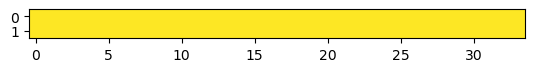

In [18]:
check_vec = np.array([[os.path.exists(os.path.join(analysis_dir,'DeNN-Denoised-S{s}-R{r}.nii.gz'.format(s=s,r=r))) for r in rvec] for s in svec]).transpose()
plt.imshow(check_vec,vmin=0,vmax=1)

In [19]:
indir = '../Data/020-fmriprepped'
subs = [s for s in os.listdir(indir) if all((s.startswith('sub'),not s.endswith('.html')))]
subs.sort()
n_orig = len(subs)

svec = np.arange(34)
rvec = [1,2]
print(svec)
print(rvec)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
[1, 2]


In [20]:
for s in svec:
    sub=subs[s]
    for r in rvec:
        
        epi_fn = os.path.join(indir,sub,'ses-baselineYear1Arm1','func',f'{sub}_ses-baselineYear1Arm1_task-nback_run-0{r}_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz')
        anat_fn = os.path.join(indir,sub,'ses-baselineYear1Arm1','anat',f'{sub}_ses-baselineYear1Arm1_run-01_space-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.nii.gz')
        anat_gm_fn = os.path.join(indir,sub,'ses-baselineYear1Arm1','anat',f'{sub}_ses-baselineYear1Arm1_run-01_space-MNI152NLin2009cAsym_res-2_label-GM_probseg.nii.gz')
        anat_wm_fn = os.path.join(indir,sub,'ses-baselineYear1Arm1','anat',f'{sub}_ses-baselineYear1Arm1_run-01_space-MNI152NLin2009cAsym_res-2_label-WM_probseg.nii.gz')
        anat_csf_fn = os.path.join(indir,sub,'ses-baselineYear1Arm1','anat',f'{sub}_ses-baselineYear1Arm1_run-01_space-MNI152NLin2009cAsym_res-2_label-CSF_probseg.nii.gz')
        events_fn = os.path.join(f'../Data/011-ABCD-events/{sub}_ses-baselineYear1Arm1_task-nback_run-0{r}_events.tsv')
        signal_fn = os.path.join(analysis_dir,'DeNN-Denoised-S{s}-R{r}.nii.gz')
        
        epi = ants.image_read(epi_fn)
        anat = ants.image_read(anat_fn)
        anat_gm = ants.image_read(anat_gm_fn)
        anat_wm = ants.image_read(anat_wm_fn)
        anat_csf = ants.image_read(anat_csf_fn)
        
        gm,cf = DeepCor_utils.get_roi_and_roni(epi,anat,anat_gm,anat_wm,anat_csf,do_plot=False) # If using individual masks
        
        im = ants.image_read(signal_fn.format(s=s,r=r))
        X1 = DeepCor_utils.get_design_matrix(im,events_fn.format(sub=subs[s],r=r))
            
        correlation_analyses = []
        contrast_analyses = []
        
        correlation_analyses.append(
            {'corr_target' : X1[['0_back_negface','0_back_neutface','0_back_posface','2_back_neutface','2_back_posface']].values.mean(axis=1),
             'filename' : os.path.join(ofdir,f'corr2face_S{s}_R{r}.nii.gz'),
             'plot' : False, 
             'ROI' : '../Misc/ffa_mask_resampled.nii'
            })
        
        correlation_analyses.append(
            {'corr_target' : X1[['0_back_place','2_back_place']].values.sum(axis=-1),
             'filename' : os.path.join(ofdir,f'corr2place_S{s}_R{r}.nii.gz'),
             'plot' : False,
             'ROI' : '../Misc/ppa_mask_resampled_97_115_97.nii.gz'
            })
        
        contrast_analyses.append(
            {'contrast_vec' : [1,1,-3,1,1,1,-3,1,0,0,0,0,0,0],
             'design_matrix' : X1,
             'filename' : os.path.join(ofdir,f'contrast_face_{s}_R{r}.nii.gz'),
             'plot' : False, 
             'ROI' : '../Misc/ffa_mask_resampled.nii'
            })
        
        contrast_analyses.append(
            {'contrast_vec' : [-1,-1,3,-1,-1,-1,3,-1,0,0,0,0,0,0],
             'design_matrix' : X1,
             'filename' : os.path.join(ofdir,f'contrast_place_S{s}_R{r}.nii.gz'),
             'plot' : False,
             'ROI' : '../Misc/ppa_mask_resampled_97_115_97.nii.gz'
            })
        
        
        for analysis_spec in correlation_analyses:
            run_correlation_analysis_from_spec(analysis_spec,im,im,im,gm)
                
        for analysis_spec in contrast_analyses:
            run_contrast_analysis_from_spec(analysis_spec,im,im,im,gm)

/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S0_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S0_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S0_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S0_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S0_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S0_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_0_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_0_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_0_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S0_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S0_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S0_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S0_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S0_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S0_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S0_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S0_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S0_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_0_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_0_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_0_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S0_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S0_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S0_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S1_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S1_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S1_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S1_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S1_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S1_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_1_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_1_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_1_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S1_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S1_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S1_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S1_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S1_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S1_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S1_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S1_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S1_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_1_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_1_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_1_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S1_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S1_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S1_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S2_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S2_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S2_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S2_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S2_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S2_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_2_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_2_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_2_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S2_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S2_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S2_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S2_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S2_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S2_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S2_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S2_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S2_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_2_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_2_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_2_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S2_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S2_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S2_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S3_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S3_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S3_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S3_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S3_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S3_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_3_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_3_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_3_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S3_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S3_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S3_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S3_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S3_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S3_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S3_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S3_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S3_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_3_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_3_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_3_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S3_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S3_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S3_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S4_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S4_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S4_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S4_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S4_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S4_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_4_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_4_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_4_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S4_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S4_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S4_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S4_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S4_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S4_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S4_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S4_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S4_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_4_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_4_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_4_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S4_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S4_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S4_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S5_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S5_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S5_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S5_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S5_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S5_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_5_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_5_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_5_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S5_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S5_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S5_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S5_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S5_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S5_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S5_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S5_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S5_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_5_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_5_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_5_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S5_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S5_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S5_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S6_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S6_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S6_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S6_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S6_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S6_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_6_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_6_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_6_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S6_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S6_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S6_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S6_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S6_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S6_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S6_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S6_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S6_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_6_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_6_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_6_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S6_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S6_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S6_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S7_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S7_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S7_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S7_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S7_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S7_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_7_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_7_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_7_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S7_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S7_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S7_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S7_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S7_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S7_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S7_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S7_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S7_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_7_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_7_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_7_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S7_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S7_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S7_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S8_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S8_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S8_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S8_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S8_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S8_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_8_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_8_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_8_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S8_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S8_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S8_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S8_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S8_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S8_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S8_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S8_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S8_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_8_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_8_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_8_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S8_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S8_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S8_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S9_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S9_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S9_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S9_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S9_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S9_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_9_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_9_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_9_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S9_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S9_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S9_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S9_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S9_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S9_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S9_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S9_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S9_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_9_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_9_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_9_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S9_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S9_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S9_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S10_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S10_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S10_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S10_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S10_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S10_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_10_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_10_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_10_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S10_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S10_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S10_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S10_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S10_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S10_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S10_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S10_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S10_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_10_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_10_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_10_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S10_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S10_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S10_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S11_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S11_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S11_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S11_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S11_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S11_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_11_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_11_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_11_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S11_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S11_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S11_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S11_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S11_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S11_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S11_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S11_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S11_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_11_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_11_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_11_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S11_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S11_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S11_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S12_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S12_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S12_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S12_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S12_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S12_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_12_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_12_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_12_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S12_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S12_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S12_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S12_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S12_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S12_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S12_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S12_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S12_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_12_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_12_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_12_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S12_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S12_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S12_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S13_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S13_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S13_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S13_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S13_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S13_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_13_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_13_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_13_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S13_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S13_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S13_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S13_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S13_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S13_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S13_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S13_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S13_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_13_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_13_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_13_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S13_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S13_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S13_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S14_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S14_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S14_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S14_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S14_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S14_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_14_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_14_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_14_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S14_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S14_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S14_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S14_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S14_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S14_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S14_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S14_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S14_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_14_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_14_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_14_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S14_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S14_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S14_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S15_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S15_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S15_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S15_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S15_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S15_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_15_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_15_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_15_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S15_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S15_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S15_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S15_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S15_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S15_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S15_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S15_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S15_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_15_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_15_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_15_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S15_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S15_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S15_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S16_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S16_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S16_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S16_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S16_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S16_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_16_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_16_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_16_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S16_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S16_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S16_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S16_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S16_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S16_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S16_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S16_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S16_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_16_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_16_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_16_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S16_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S16_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S16_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S17_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S17_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S17_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S17_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S17_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S17_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_17_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_17_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_17_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S17_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S17_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S17_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S17_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S17_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S17_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S17_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S17_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S17_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_17_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_17_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_17_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S17_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S17_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S17_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S18_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S18_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S18_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S18_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S18_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S18_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_18_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_18_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_18_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S18_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S18_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S18_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S18_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S18_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S18_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S18_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S18_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S18_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_18_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_18_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_18_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S18_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S18_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S18_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S19_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S19_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S19_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S19_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S19_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S19_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_19_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_19_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_19_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S19_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S19_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S19_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S19_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S19_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S19_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S19_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S19_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S19_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_19_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_19_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_19_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S19_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S19_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S19_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S20_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S20_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S20_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S20_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S20_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S20_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_20_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_20_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_20_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S20_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S20_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S20_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S20_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S20_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S20_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S20_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S20_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S20_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_20_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_20_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_20_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S20_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S20_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S20_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S21_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S21_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S21_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S21_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S21_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S21_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_21_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_21_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_21_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S21_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S21_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S21_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S21_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S21_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S21_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S21_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S21_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S21_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_21_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_21_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_21_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S21_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S21_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S21_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S22_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S22_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S22_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S22_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S22_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S22_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_22_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_22_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_22_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S22_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S22_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S22_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S22_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S22_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S22_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S22_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S22_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S22_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_22_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_22_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_22_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S22_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S22_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S22_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S23_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S23_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S23_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S23_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S23_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S23_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_23_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_23_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_23_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S23_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S23_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S23_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S23_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S23_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S23_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S23_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S23_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S23_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_23_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_23_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_23_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S23_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S23_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S23_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S24_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S24_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S24_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S24_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S24_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S24_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_24_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_24_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_24_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S24_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S24_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S24_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S24_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S24_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S24_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S24_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S24_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S24_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_24_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_24_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_24_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S24_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S24_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S24_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S25_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S25_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S25_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S25_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S25_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S25_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_25_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_25_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_25_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S25_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S25_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S25_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S25_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S25_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S25_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S25_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S25_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S25_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_25_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_25_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_25_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S25_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S25_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S25_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S26_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S26_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S26_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S26_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S26_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S26_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_26_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_26_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_26_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S26_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S26_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S26_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S26_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S26_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S26_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S26_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S26_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S26_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_26_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_26_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_26_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S26_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S26_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S26_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S27_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S27_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S27_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S27_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S27_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S27_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_27_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_27_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_27_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S27_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S27_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S27_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S27_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S27_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S27_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S27_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S27_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S27_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_27_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_27_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_27_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S27_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S27_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S27_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S28_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S28_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S28_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S28_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S28_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S28_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_28_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_28_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_28_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S28_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S28_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S28_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S28_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S28_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S28_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S28_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S28_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S28_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_28_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_28_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_28_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S28_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S28_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S28_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S29_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S29_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S29_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S29_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S29_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S29_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_29_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_29_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_29_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S29_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S29_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S29_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S29_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S29_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S29_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S29_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S29_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S29_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_29_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_29_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_29_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S29_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S29_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S29_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S30_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S30_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S30_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S30_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S30_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S30_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_30_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_30_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_30_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S30_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S30_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S30_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S30_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S30_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S30_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S30_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S30_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S30_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_30_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_30_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_30_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S30_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S30_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S30_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S31_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S31_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S31_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S31_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S31_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S31_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_31_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_31_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_31_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S31_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S31_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S31_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S31_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S31_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S31_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S31_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S31_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S31_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_31_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_31_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_31_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S31_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S31_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S31_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S32_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S32_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S32_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S32_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S32_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S32_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_32_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_32_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_32_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S32_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S32_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S32_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S32_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S32_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S32_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S32_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S32_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S32_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_32_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_32_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_32_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S32_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S32_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S32_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S33_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S33_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S33_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S33_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S33_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S33_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_33_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_33_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_33_R1_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S33_R1_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S33_R1_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S33_R1_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:942: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S33_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S33_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2face_S33_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S33_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S33_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/corr2place_S33_R2_deepcor.nii.gz


/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code/DeepCor_utils.py:968: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y-Y.mean(axis=1)[:,np.newaxis])/Y.std(axis=1)[:,np.newaxis] # Z score values


saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_33_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_33_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_33_R2_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S33_R2_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S33_R2_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_place_S33_R2_deepcor.nii.gz


In [28]:
svec = np.arange(32)

In [29]:
def get_roi_data(im_fn,roi_fn):
    roi = ants.image_read(roi_fn)
    im = ants.image_read(im_fn)

    #roi_data = im.numpy()[roi.numpy()==1].mean()
    roi_data = np.nanmean(im.numpy()[roi.numpy()==1])
    return roi_data

res = [[get_roi_data(os.path.join(ofdir,'contrast_face_{s}_R{r}_deepcor.nii.gz'.format(s=s,r=r)),'../Data/ABCD-indiv-ROIs/FFA-ROI-S{s}.nii'.format(s=s)) for r in rvec] for s in svec]
res = np.array(res)
print(res.mean().round(2))

res = [[get_roi_data(os.path.join(ofdir,'contrast_place_S{s}_R{r}_deepcor.nii.gz'.format(s=s,r=r)),'../Data/ABCD-indiv-ROIs/FFA-ROI-S{s}.nii'.format(s=s)) for r in rvec] for s in svec]
res = np.array(res)
print(res.mean().round(2))

res = [[get_roi_data(os.path.join(ofdir,'corr2face_S{s}_R{r}_deepcor.nii.gz'.format(s=s,r=r)),'../Data/ABCD-indiv-ROIs/FFA-ROI-S{s}.nii'.format(s=s)) for r in rvec] for s in svec]
res = np.array(res)
print(res.mean().round(2))

res = [[get_roi_data(os.path.join(ofdir,'corr2place_S{s}_R{r}_deepcor.nii.gz'.format(s=s,r=r)),'../Data/ABCD-indiv-ROIs/FFA-ROI-S{s}.nii'.format(s=s)) for r in rvec] for s in svec]
res = np.array(res)
print(res.mean().round(2))

-0.03
0.03
-0.0
0.0


#THINGS

In [5]:
analysis_name = 'DeNN-things-neurips-v1'
analysis_dir = os.path.join('../Data/StudyForrest/ensembles_last_CVAE',analysis_name)
ofdir = analysis_dir
analysis_dir

'../Data/StudyForrest/ensembles_last_CVAE/DeNN-things-neurips-v1'

In [6]:
vec_idx = np.arange(18)
idx = 0

i_s = []
j_s = []
for i in range(3):
    for j in range(1,7):
        i_s.append(i)
        j_s.append(j)
print(len(i_s))
print(i_s)
print(j_s)
s = i_s[idx]
r = j_s[idx]
print(f's={s}')
print(f'r={r}')

18
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
[1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]
s=0
r=1


In [ ]:
indir = '../Data/things/fmriprep2'
subs_orig = [s for s in os.listdir(indir) if all((s.startswith('sub'),not s.endswith('.html')))]
subs_orig.sort()
n_orig = len(subs_orig)

for idx in vec_idx:

    s = i_s[idx]
    r = j_s[idx]
    sub = subs_orig[s]
    
    sess_name = 'ses-localizer2' if sub=='sub-01' else 'ses-localizer1'
    
    epi_fn = os.path.join(indir,sub,sess_name,'func',f'{sub}_{sess_name}_task-6cat_run-{r:02d}_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz')
    anat_fn = os.path.join(indir,sub,'anat',f'{sub}_rec-pydeface_space-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.nii.gz')
    anat_gm_fn = os.path.join(indir,sub,'anat',f'{sub}_rec-pydeface_space-MNI152NLin2009cAsym_res-2_label-GM_probseg.nii.gz')
    anat_wm_fn = os.path.join(indir,sub,'anat',f'{sub}_rec-pydeface_space-MNI152NLin2009cAsym_res-2_label-WM_probseg.nii.gz')
    anat_csf_fn = os.path.join(indir,sub,'anat',f'{sub}_rec-pydeface_space-MNI152NLin2009cAsym_res-2_label-CSF_probseg.nii.gz')
    conf_fn = os.path.join(indir,sub,sess_name,'func',f'{sub}_{sess_name}_task-6cat_run-{r:02d}_desc-confounds_timeseries.tsv')
    events_fn = f'../Data/things/ds004192/{sub}/{sess_name}/func/{sub}_{sess_name}_task-6cat_run-{r:02d}_events.tsv'
    
    epi = ants.image_read(epi_fn.format(sub=sub,r=r))
    anat = ants.image_read(anat_fn.format(sub=sub,r=r))
    anat_gm = ants.image_read(anat_gm_fn.format(sub=sub,r=r))
    anat_wm = ants.image_read(anat_wm_fn.format(sub=sub,r=r))
    anat_csf = ants.image_read(anat_csf_fn.format(sub=sub,r=r))
    df_conf = pd.read_csv(conf_fn,delimiter='\t')
    
    signal_fn = os.path.join(analysis_dir,'DeNN-Denoised-S{s}-R{r}.nii.gz')
    im = ants.image_read(signal_fn.format(s=s,r=r))
    gm,cf = DeepCor_utils.get_roi_and_roni(epi,anat,anat_gm,anat_wm,anat_csf,do_plot=False) # If using individual masks
    
    events_fn = os.path.join(events_fn)
    X1 = get_design_matrix(epi,events_fn)
    
    correlation_analyses = []
    contrast_analyses = []
    
    correlation_analyses.append(
        {'corr_target' : X1['faces'].values,
         'filename' : os.path.join(ofdir,f'corr2face_S{s}_R{r}.nii.gz'),
         'plot' : False, 
         'ROI' : '../Misc/ffa_mask_resampled.nii'
        })
    
    correlation_analyses.append(
        {'corr_target' : X1['scenes'].values,
         'filename' : os.path.join(ofdir,f'corr2place_S{s}_R{r}.nii.gz'),
         'plot' : False,
         'ROI' : '../Misc/ppa_mask_resampled_97_115_97.nii.gz'
        })
    
    contrast_analyses.append(
        {'contrast_vec' : [-1,5,-1,-1,-1,-1,0,0,0,0],
         'design_matrix' : X1,
         'filename' : os.path.join(ofdir,f'contrast_face_S{s}_R{r}.nii.gz'),
         'plot' : False, 
         'ROI' : '../Misc/ffa_mask_resampled.nii'
        })
    
    contrast_analyses.append(
        {'contrast_vec' : [-1,-1,-1,5,-1,-1,0,0,0,0],
         'design_matrix' : X1,
         'filename' : os.path.join(ofdir,f'contrast_place_S{s}_R{r}.nii.gz'),
         'plot' : False,
         'ROI' : '../Misc/ppa_mask_resampled_97_115_97.nii.gz'
        })
    
    for analysis_spec in correlation_analyses:
        run_correlation_analysis_from_spec(analysis_spec,im,im,im,gm)
            
    for analysis_spec in contrast_analyses:
        run_contrast_analysis_from_spec(analysis_spec,im,im,im,gm)

In [8]:
svec = [0,1,2]
rvec = [1,2,3,4,5,6]

In [23]:
def get_roi_data(im_fn,roi_fn):
    roi = ants.image_read(roi_fn)
    im = ants.image_read(im_fn)

    #roi_data = im.numpy()[roi.numpy()==1].mean()
    roi_data = np.nanmean(im.numpy()[roi.numpy()==1])
    return roi_data

res = [[get_roi_data(os.path.join(ofdir,'contrast_face_S{s}_R{r}_deepcor.nii.gz'.format(s=s,r=r)),'../Data/things/ROIs-indiv/FFA-ROI-S{s}.nii'.format(s=s)) for r in rvec] for s in svec]
res = np.array(res)
print(res.mean().round(2))

res = [[get_roi_data(os.path.join(ofdir,'contrast_place_S{s}_R{r}_deepcor.nii.gz'.format(s=s,r=r)),'../Data/things/ROIs-indiv/PPA-ROI-S{s}.nii'.format(s=s)) for r in rvec] for s in svec]
res = np.array(res)
print(res.mean().round(2))

res = [[get_roi_data(os.path.join(ofdir,'corr2face_S{s}_R{r}_deepcor.nii.gz'.format(s=s,r=r)),'../Data/things/ROIs-indiv/FFA-ROI-S{s}.nii'.format(s=s)) for r in rvec] for s in svec]
res = np.array(res)
print(res.mean().round(2))

res = [[get_roi_data(os.path.join(ofdir,'corr2place_S{s}_R{r}_deepcor.nii.gz'.format(s=s,r=r)),'../Data/things/ROIs-indiv/PPA-ROI-S{s}.nii'.format(s=s)) for r in rvec] for s in svec]
res = np.array(res)
print(res.mean().round(2))

ValueError: File ../Data/StudyForrest/ensembles_last_CVAE/DeNN-ABCD-neurips-v2/contrast_face_S0_R1_deepcor.nii.gz does not exist!